## Algoritmia
### Práctica 11
En esta práctica se trabaja con expresiones booleanas en *forma normal conjuntiva*. También se aplica la reducción del problema de la *satisfacibilidad* al del *k-clique*.

En el cuerpo de cada función o método a implementar hay una instrucción "pass", se debe sustituir por la implementación adecuada. La implementación debe ser propia, sin incluir código ajeno o realizado conjuntamente. No se debe modificar el resto del código proporcionado.

Para cada clase o función que se pide se proporcionan algunos tests. Las implementaciones deberían superar estos tests.

## Preámbulo
No se puede importar de otros módulos, salvo que se consulte previamente con el profesor

In [1]:
# Importaciones
import unittest
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## Clase `FormaNormalConjuntiva`

In [ ]:
class FormaNormalConjuntiva:
    """
    Clase que representa una expresión en forma normal conjuntiva.
    Las cláusulas son secuencias con dos elementos, el primero contiene las
    variables que están sin negar, el segundo las que están negadas.
    """

    def __init__(self, *clausulas):
        """Constructor. Si se reciben cláusulas se añaden a la expresión."""
        self.var = [i for i in clausulas[0] if len(i) != 0] if clausulas != () else [] 
        self.clausulas = [j for i in self.var for j in i ]

    def num_variables(self):
        """Devuelve el número de variables que aparecen en la expresión."""
        return len(self.clausulas)

    def __len__(self):
        """Devuelve el número de clausulas."""
        return len(self.var)

    def inserta_clausulas(self, *clausulas):
        """Inserta cláusulas adicionales al final de la expresión."""
        
        for i in clausulas[0]:
            for j in i:
                if j not in self.clausulas:
                    self.clausulas.append(j)
        for i in clausulas:
            self.var.append(i)
            
    def __getitem__(self, i):
        """Devuelve la cláusula i-ésima. Para la primera, i=0."""
        
        return self.clausulas[i]
        
    def evalua(self, ciertas):
        """
        Evalua la expresión, es decir, devuelve True o False, dada una
        asignación de valores a las variables. La asignación se indica con el
        iterable "ciertas" en el que están las variables que están a cierto.
        El resto de variables se entiende que están a falso.
        """
        aux = False
        if ciertas in self.clausulas:
            aux=True
        return aux

    def asignacion_satisfacible(self):       
        """
        Si la expresión es satisfacible, devuelve una asignación que hace
        la expresión cierta. La asignación se indica como un iterable de las
        variables que están a cierto, el resto de variables estarán a falso.
        Si la expresión no es satisfacible devuelve None.
        """
        
        pass

### Tests para la clase `FormaNormalConjuntiva`

In [ ]:
class TestFormaNormalConjuntiva(unittest.TestCase):
    """Tests para la clase ArbolBusquedaOptimo"""
    
    def test_forma_normal_conjuntiva_1(self):
        """Primer test para la clase FormaNormalConjuntiva."""
        
        fnc = FormaNormalConjuntiva()
        self.assertEqual(fnc.num_variables(), 0)
        self.assertEqual(len(fnc), 0)
    
        fnc.inserta_clausulas([["x_1", "x_4"], ["x_3"]])
        self.assertEqual(fnc.num_variables(), 3)
        self.assertEqual(len(fnc), 1)
    
        fnc.inserta_clausulas([["x_3"], ["x_2", "x_4"]])
        self.assertEqual(fnc.num_variables(), 4)
        self.assertEqual(len(fnc), 2)
    
        self.assertTrue(fnc.evalua([]))
        self.assertTrue(fnc.evalua(("x_1", "x_2", "x_3", "x_4")))
        self.assertFalse(fnc.evalua(("x_3",)))
        self.assertFalse(fnc.evalua(("x_2", "x_4")))
    
        asignacion = fnc.asignacion_satisfacible()
        self.assertIsNotNone(asignacion)
        self.assertTrue(fnc.evalua(asignacion))
        
    def test_forma_normal_conjuntiva_2(self):
        """Segundo test para la clase FormaNormalConjuntiva."""
        
        fnc = FormaNormalConjuntiva([["x_1", "x_2", "x_3"], []])
        self.assertEqual(fnc.num_variables(), 3)
        self.assertEqual(len(fnc), 1)
    
        fnc.inserta_clausulas(
            [["x_2"], ["x_1", "x_3"]],
            [["x_1", "x_3"], ["x_2"]],
            [[], ["x_1", "x_2", "x_3"]])
    
        self.assertEqual(fnc.num_variables(), 3)
        self.assertEqual(len(fnc), 4)
        
        self.assertTrue(fnc.evalua(["x_1"]))
        self.assertFalse(fnc.evalua([]))
        self.assertFalse(fnc.evalua(["x_1", "x_2", "x_3"]))
    
        asignacion = fnc.asignacion_satisfacible()
        self.assertIsNotNone(asignacion)
        self.assertTrue(fnc.evalua(asignacion))   
 
    def test_forma_normal_conjuntiva_3(self):
        """Tercer test para la clase FormaNormalConjuntiva."""
        
        fnc = FormaNormalConjuntiva(        
            [["x_1", "x_2", "x_3"], []],
            [["x_2", "x_3"], ["x_1"]])
        self.assertEqual(fnc.num_variables(), 3)
        self.assertEqual(len(fnc), 2)
    
        fnc.inserta_clausulas(
            [["x_1", "x_3"], ["x_2"]],
            [["x_3"], ["x_1", "x_2"]],
            [[], ["x_3"]])
        
        self.assertEqual(fnc.num_variables(), 3)
        self.assertEqual(len(fnc), 5)
        
        self.assertFalse(fnc.evalua([]))
        self.assertFalse(fnc.evalua(["x_1", "x_2", "x_3"]))
        
        asignacion = fnc.asignacion_satisfacible()
        self.assertIsNone(asignacion) 
    
    def test_forma_normal_conjuntiva_4(self):
        """Cuarto test para la clase FormaNormalConjuntiva."""
        
        fnc = FormaNormalConjuntiva()
        self.assertEqual(fnc.num_variables(),  0)
        self.assertEqual(len(fnc), 0)
    
        fnc.inserta_clausulas(
            [["x_1", "x_2"], []],
            [["x_2", "x_3"], []],
            [["x_3", "x_4"], []],
            [["x_4", "x_5"], []],
            [["x_5", "x_6"], []])
        
        self.assertEqual(fnc.num_variables(), 6)
        self.assertEqual(len(fnc), 5)
        
        self.assertFalse(fnc.evalua([]))
        self.assertFalse(fnc.evalua(["x_1", "x_2", "x_3"]))
        self.assertTrue(fnc.evalua(["x_2", "x_4", "x_6"]))
        self.assertTrue(fnc.evalua(["x_1", "x_3", "x_5"]))
        
        asignacion = fnc.asignacion_satisfacible()
        self.assertIsNotNone(asignacion)
        self.assertTrue(fnc.evalua(asignacion))

## Reducción a k-clique
La implementación de grafo utilizada es [`Graph`](https://networkx.github.io/documentation/stable/reference/classes/graph.html) the [NetworkX](https://networkx.github.io/).

In [2]:
def reduccion_a_clique(fnc):
    """
    Dada una expresión en forma normal conjuntiva, devuelve el grafo 
    correspondiente a la reducción al problema del k-clique.
    Los nodos son cadenas con el formato "(i:l)", donde i es el número de
    clásula y l representa el literal. El literal es la variable, precedido por
    '!' si está negada.
    """
    
    print(fnc)

### Grafo de prueba

In [3]:
def grafo_de_prueba():
    """
    Devuelve un grafo como los que se pueden obtener con reduccion_a_clique().
    """
    
    return nx.Graph([
        ('0:x_2', '2:!x_1'), ('0:x_2', '1:!x_1'), ('0:x_2', '1:x_3'), 
        ('0:x_2', '1:x_2'), ('0:x_2', '2:x_3'), ('1:!x_1', '2:!x_1'), 
        ('1:!x_1', '2:x_3'), ('2:!x_1', '1:x_3'), ('2:!x_1', '1:x_2'), 
        ('0:x_1', '1:x_3'), ('0:x_1', '1:x_2'), ('0:x_1', '2:x_3'), 
        ('2:x_3', '1:x_3'), ('2:x_3', '1:x_2')])

### Dibujo de grafos

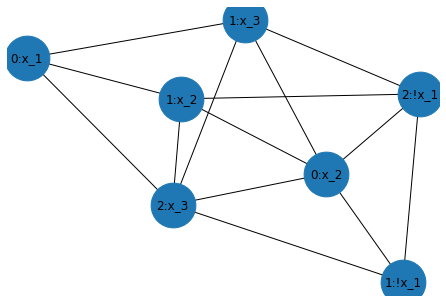

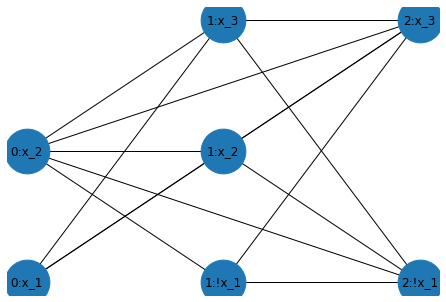

In [4]:
def dibuja_grafo_de_reduccion(grafo, posicionado=False):
    """
    Dibuja un grafo, suponiendo que las etiquetas de los nodos siguen el formato
    utilizado en reduccion_a_clique().
    Si el argumento "posicionado" es cierto, la posición de cada nodo depende de
    la claúsula y literal correspondiente.
    """
    
    pos = None
    if posicionado:
        pos = {n: (int(n.split(":")[0]), int(n.split("_")[1])) 
               for n in grafo.nodes()}
    
    nx.draw(grafo, with_labels = True, node_size = 2000, pos = pos)
    plt.show()

    
if __name__ == "__main__": 
    dibuja_grafo_de_reduccion(grafo_de_prueba())
    dibuja_grafo_de_reduccion(grafo_de_prueba(), True)

### Igualdad de grafos

In [5]:
def grafos_iguales(g1, g2):
    """
    Devuelve un booleano indicando si dos grafos son iguales: tienen los
    mismos nodos y arcos.
    """
    
    if set(g1.nodes()) != set(g2.nodes()):
        return False
  
    # No funciona comparar g1.edges() con g2.edges() porque en los arcos los 
    # nodos puede aparecer en distinto orden.
    
    for a, b in [(g1, g2), (g2, g1)]:
        for u, v in a.edges():
            if not b.has_edge(u, v):
                return False
    return True

### Tests para `reduccion_a_clique`

In [6]:
class TestReduccionAClique(unittest.TestCase):
    """Tests para la función reduccion_a_clique()"""
        
    def test_reduccion_a_clique(self):
        
        fnc = FormaNormalConjuntiva(
            [["x_1", "x_2"], []],
            [["x_2", "x_3"], ["x_1"]],
            [["x_3"], ["x_1"]]
        )    
        
        g1 = reduccion_a_clique(fnc)
        g2 = grafo_de_prueba()
        
        self.assertTrue(grafos_iguales(g1, g2))  
        self.assertTrue(grafos_iguales(g2, g1))

## Ejecución de tests

In [7]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

E
ERROR: test_reduccion_a_clique (__main__.TestReduccionAClique)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-6-a396455d4dce>", line 6, in test_reduccion_a_clique
    fnc = FormaNormalConjuntiva(
NameError: name 'FormaNormalConjuntiva' is not defined

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)
